# 1. Цель лабораторной работы

Изучить способы предварительной обработки данных для дальнейшего формирования моделей.

# 2. Задание:

1.Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.) Просьба не использовать датасет, на котором данная задача решалась в лекции. 


2.Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи: 

(1)устранение пропусков в данных; 

(2)кодирование категориальных признаков; 

(3)нормализацию числовых признаков. 

# 3. Ход выполнения работы

Подключим все необходимые библиотеки и настроим отображение графиков:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from IPython import display
%matplotlib inline 
sns.set(style="ticks")

In [2]:
# Будем использовать только обучающую выборку
data = pd.read_csv('./countries of the world.csv', sep=",")


In [3]:
data.shape

(227, 20)

Посмотрим на эти наборы данных:

In [4]:
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


# 3.1. Обработка пропусков в данных

In [5]:
data.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [6]:
# Колонки с пропусками有间隙的列
hcols_with_na = [c for c in data.columns if data[c].isnull().sum() > 0]
[(c,data[c].isnull().sum())for c in hcols_with_na]
[(c,data[c].isnull().mean())for c in hcols_with_na]

[('Net migration', 0.013215859030837005),
 ('Infant mortality (per 1000 births)', 0.013215859030837005),
 ('GDP ($ per capita)', 0.004405286343612335),
 ('Literacy (%)', 0.07929515418502203),
 ('Phones (per 1000)', 0.01762114537444934),
 ('Arable (%)', 0.00881057268722467),
 ('Crops (%)', 0.00881057268722467),
 ('Other (%)', 0.00881057268722467),
 ('Climate', 0.09691629955947137),
 ('Birthrate', 0.013215859030837005),
 ('Deathrate', 0.01762114537444934),
 ('Agriculture', 0.06607929515418502),
 ('Industry', 0.07048458149779736),
 ('Service', 0.06607929515418502)]

In [7]:
data.shape

(227, 20)

In [8]:
# Количество пропусков跳过次数
[(c, data[c].isnull().sum()) for c in hcols_with_na]

[('Net migration', 3),
 ('Infant mortality (per 1000 births)', 3),
 ('GDP ($ per capita)', 1),
 ('Literacy (%)', 18),
 ('Phones (per 1000)', 4),
 ('Arable (%)', 2),
 ('Crops (%)', 2),
 ('Other (%)', 2),
 ('Climate', 22),
 ('Birthrate', 3),
 ('Deathrate', 4),
 ('Agriculture', 15),
 ('Industry', 16),
 ('Service', 15)]

In [9]:
# Доля (процент) пропусков遗漏的份额（百分比）
[(c, data[c].isnull().mean()) for c in hcols_with_na]

[('Net migration', 0.013215859030837005),
 ('Infant mortality (per 1000 births)', 0.013215859030837005),
 ('GDP ($ per capita)', 0.004405286343612335),
 ('Literacy (%)', 0.07929515418502203),
 ('Phones (per 1000)', 0.01762114537444934),
 ('Arable (%)', 0.00881057268722467),
 ('Crops (%)', 0.00881057268722467),
 ('Other (%)', 0.00881057268722467),
 ('Climate', 0.09691629955947137),
 ('Birthrate', 0.013215859030837005),
 ('Deathrate', 0.01762114537444934),
 ('Agriculture', 0.06607929515418502),
 ('Industry', 0.07048458149779736),
 ('Service', 0.06607929515418502)]

In [10]:
# Колонки для которых удаляются пропуски删除间隙的列
hcols_with_na_temp = ['Literacy (%)', 'Climate', 'Deathrate', 'Other (%)']

In [11]:
# Удаление пропусков
data_drop = data[hcols_with_na_temp].dropna()
data_drop.shape

(187, 4)

In [12]:
def plot_hist_diff(old_ds, new_ds, cols):
    """
    Разница между распределениями до и после устранения пропусков
    """
    for c in cols:   
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.title.set_text('После - ' + str(c))
        old_ds[c].hist(bins=50, ax=ax, density=True, color='green')
        new_ds[c].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.5)
        plt.show()
        

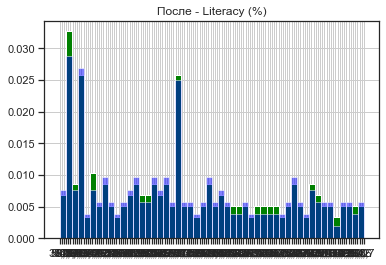

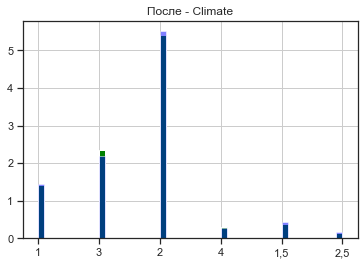

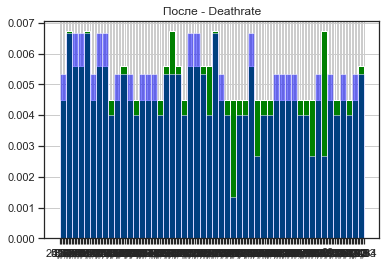

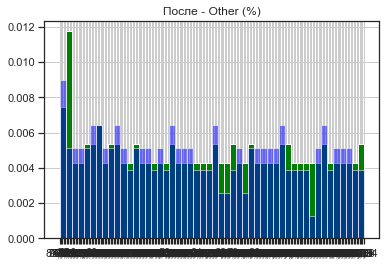

In [13]:
plot_hist_diff(data, data_drop, hcols_with_na_temp)

Очевидно, что удаление отсутствующих данных мало влияет.

# 3.2. Кодирование категориальных признаков

Рассмотрим колонку Region:

In [14]:
region=data["Region"].dropna().astype(str)
region.value_counts()

SUB-SAHARAN AFRICA                     51
LATIN AMER. & CARIB                    45
ASIA (EX. NEAR EAST)                   28
WESTERN EUROPE                         28
OCEANIA                                21
NEAR EAST                              16
EASTERN EUROPE                         12
C.W. OF IND. STATES                    12
NORTHERN AFRICA                         6
NORTHERN AMERICA                        5
BALTICS                                 3
Name: Region, dtype: int64

Выполним кодирование категорий целочисленными значениями:

In [15]:
import sklearn.impute
import sklearn.preprocessing

In [16]:
le=sklearn.preprocessing.LabelEncoder()
type_le = le.fit_transform(region)
print(np.unique(type_le))
le.inverse_transform(np.unique(type_le))

[ 0  1  2  3  4  5  6  7  8  9 10]


array(['ASIA (EX. NEAR EAST)         ',
       'BALTICS                            ', 'C.W. OF IND. STATES ',
       'EASTERN EUROPE                     ', 'LATIN AMER. & CARIB    ',
       'NEAR EAST                          ',
       'NORTHERN AFRICA                    ',
       'NORTHERN AMERICA                   ',
       'OCEANIA                            ',
       'SUB-SAHARAN AFRICA                 ',
       'WESTERN EUROPE                     '], dtype=object)

Выполним кодирование категорий наборами бинарных значений:

In [17]:
region_one_hot=pd.get_dummies(region)
region_one_hot.head()

,ASIA (EX. NEAR EAST),BALTICS,C.W. OF IND. STATES,EASTERN EUROPE,LATIN AMER. & CARIB,NEAR EAST,NORTHERN AFRICA,NORTHERN AMERICA,OCEANIA,SUB-SAHARAN AFRICA,WESTERN EUROPE
0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,1


# 3.3. Нормализацию числовых признаков.

Подключим библиотеку：

In [18]:
import scipy.stats as stats

In [19]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot = plt)
    plt.show()

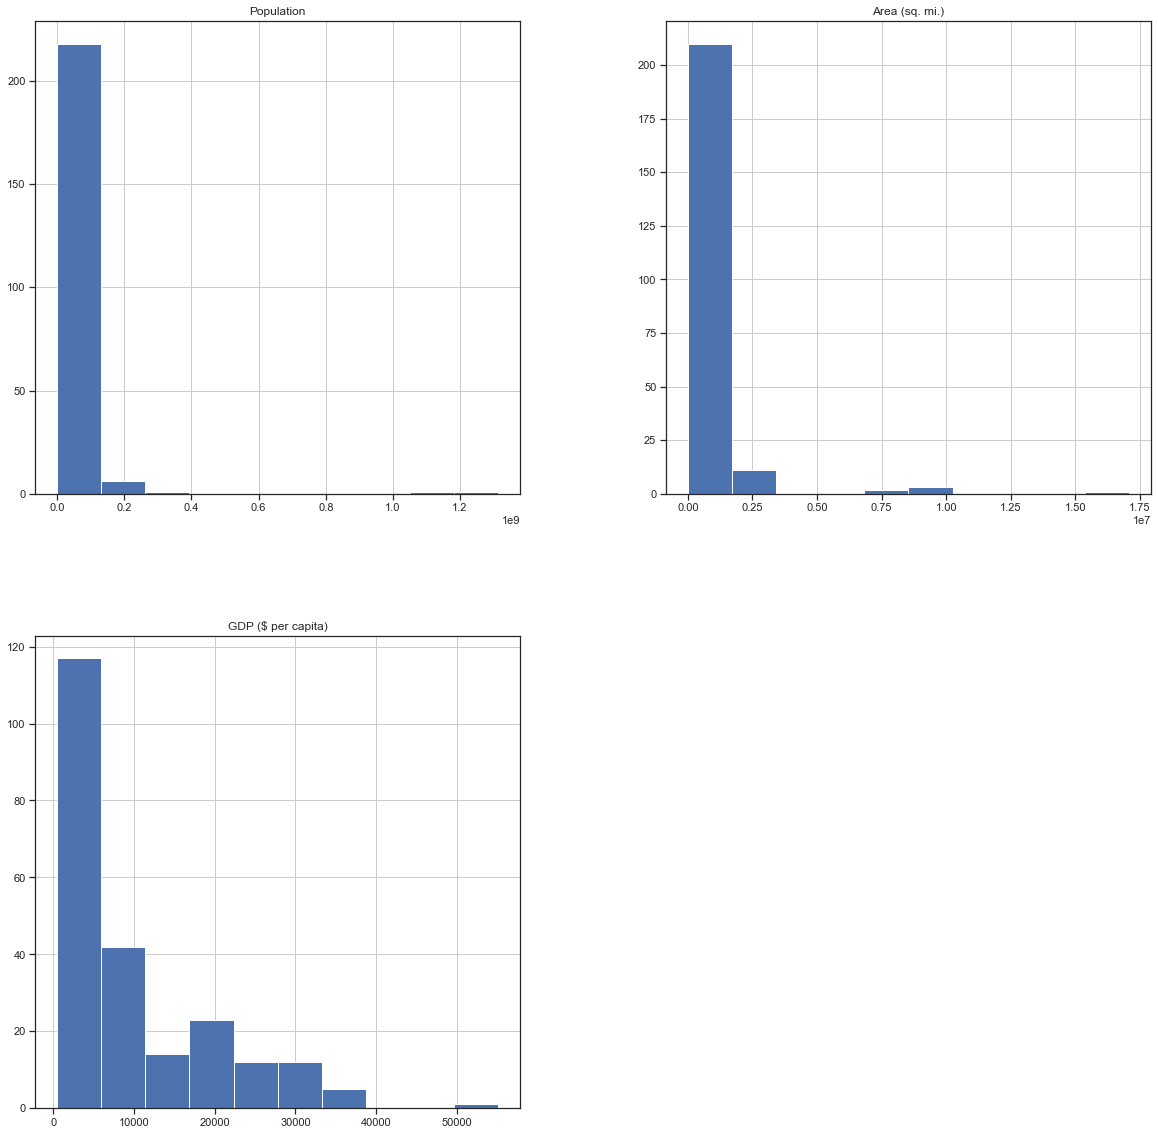

In [20]:
data.hist(figsize=(20,20))
plt.show()

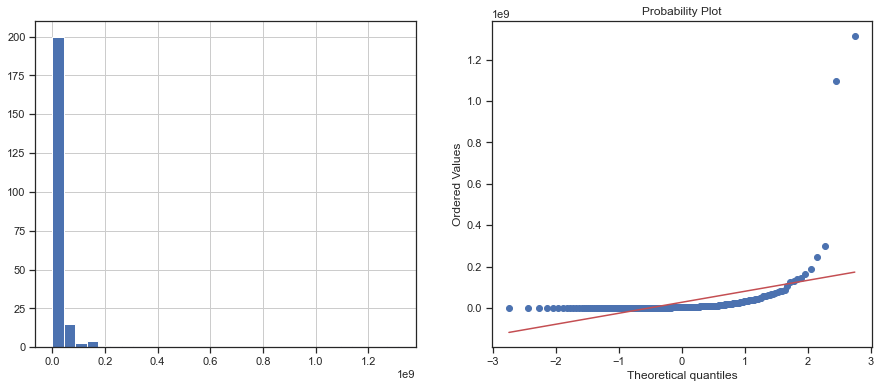

In [21]:
diagnostic_plots(data, 'Population')

Логарифмическое преобразование

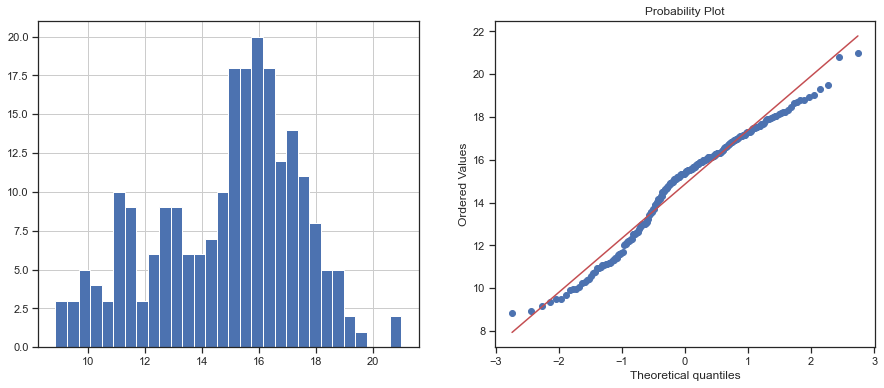

In [22]:
data['Population_log'] = np.log(data['Population'])
diagnostic_plots(data, 'Population_log')

Обратное преобразование

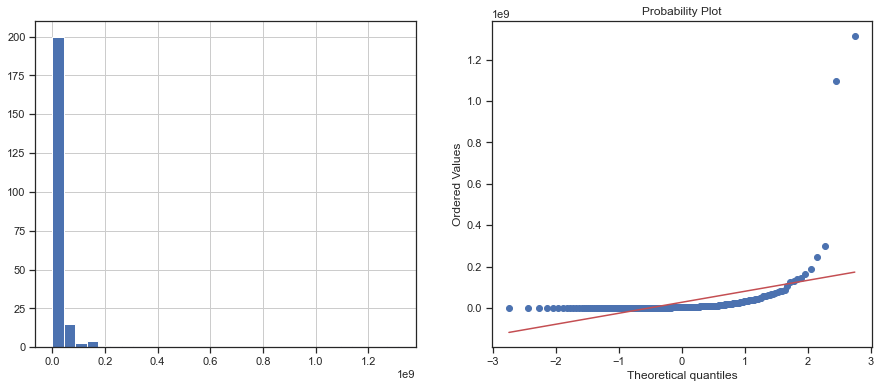

In [23]:
data['Population_reciprocal'] = 1 / (data['Population']) 
diagnostic_plots(data, 'Population')

Квадратный корень

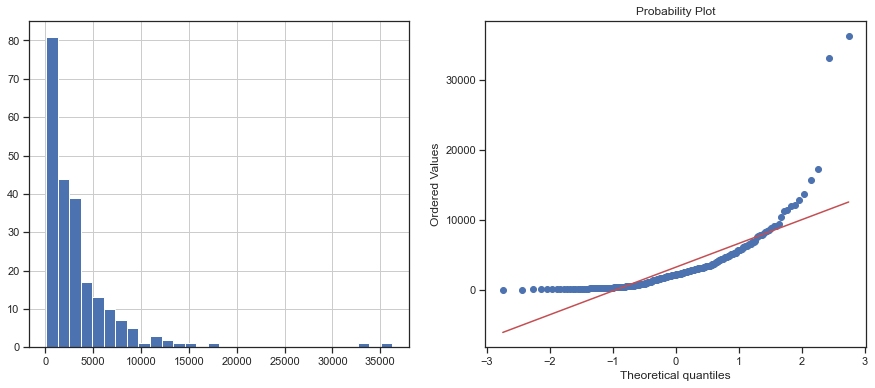

In [24]:
data['Population_sqr'] = data['Population']**(1/2) 
diagnostic_plots(data, 'Population_sqr')

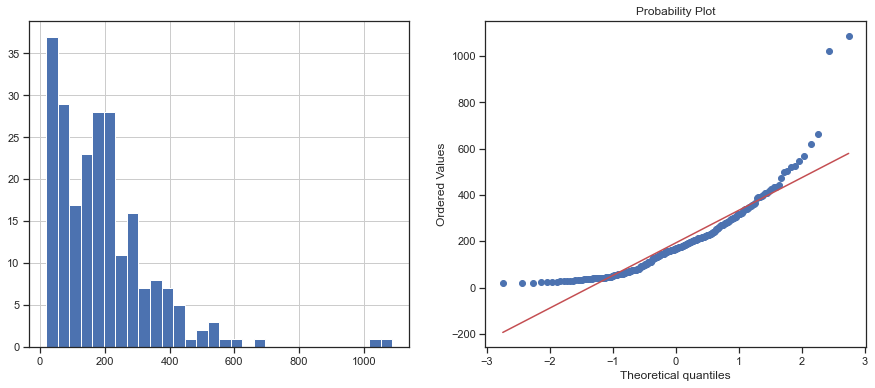

In [25]:
data['Population_exp3'] = data['Population']**(0.333)
diagnostic_plots(data, 'Population_exp3')

Преобразование Бокса-Кокса

Оптимальное значение λ = 0.06972098493904787


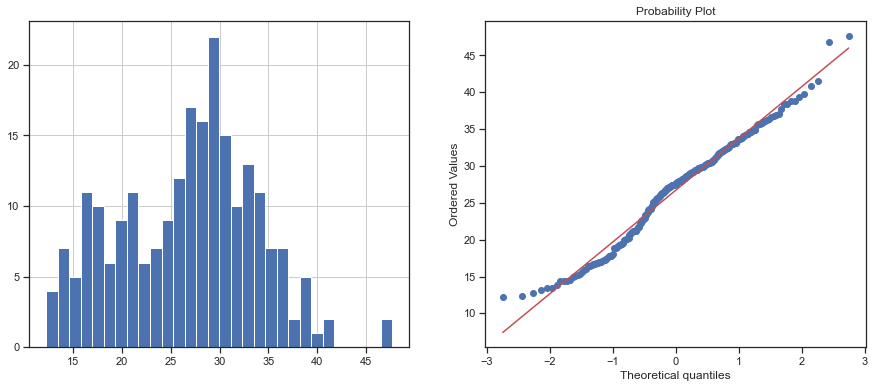

In [26]:
data['Population_boxcox'], param = stats.boxcox(data['Population']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'Population_boxcox')

Преобразование Йео-Джонсона

E:\anaconda3\lib\site-packages\scipy\stats\morestats.py:1557: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(trans.var(axis=0))
E:\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2216: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
E:\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2217: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = 2.0 * (tmp2 - tmp1)
E:\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
E:\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2214: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)


Оптимальное значение λ = -7.444931704483778


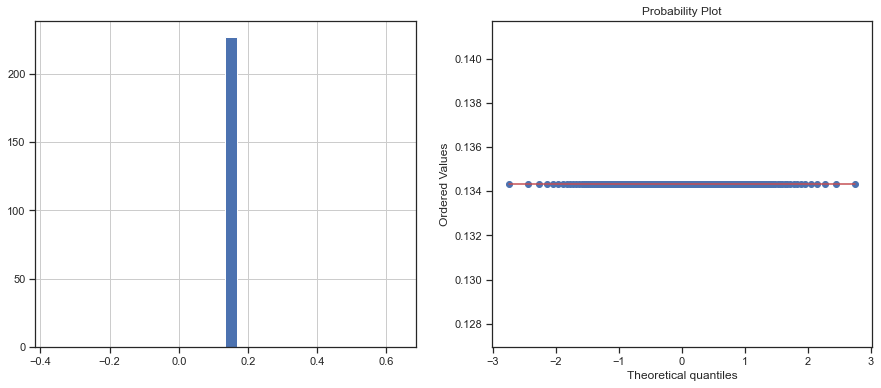

In [27]:
data['Population'] = data['Population'].astype('float')
data['Population_yeojohnson'], param = stats.yeojohnson(data['Population']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'Population_yeojohnson')